# Tres en raya

In [82]:
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import random 
import numpy as np

In [83]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [84]:
batch_size = 50

In [85]:
def print_board(board):
    symbols = ['O', ' ', 'X']
    board_plus_1 = [int(x)+1 for x in board] #convierte el -1-> O  0 -> ' '  1-> X
    board_line_1 = '{}|{}|{}'.format(symbols[board_plus_1[0]], symbols[board_plus_1[1]], symbols[board_plus_1[2]])
    board_line_2 = '{}|{}|{}'.format(symbols[board_plus_1[3]], symbols[board_plus_1[4]], symbols[board_plus_1[5]])
    board_line_3 = '{}|{}|{}'.format(symbols[board_plus_1[6]], symbols[board_plus_1[7]], symbols[board_plus_1[8]])
    print(board_line_1)
    print('_____')
    print(board_line_2)
    print('_____')
    print(board_line_3)

In [86]:
print_board([-1,0,0,1,1,0,0,-1,1])

O| | 
_____
X|X| 
_____
 |O|X


In [87]:
#Funcion que da el nuevo tablero de acuerdo a la tranformacion, y la nueva posicion (idx) del idx dado

def get_symmetry(board, idx, transformation):
    '''
    :param board: lista de 9 enteros formados por:
    - O = -1, símbolo del enemigo
    - X =  1, símbolo del jugador
    - ' ' = 0, casilla vacía
    :param transformation: ona de las cinco transformaciones del tablero:
    - rotate90, rotate180, rotate270, flip_v, flip_h
    :return: tuple(new_board, new_idx)
    '''
    
    if transformation == 'rotate180':
        new_idx = 8-idx
        return board[::-1], new_idx
    
    elif transformation == 'rotate90':
        new_idx = [6,3,0,7,4,1,8,5,2].index(idx)
        tuple_board = list(zip(*[board[6:9], board[3:6], board[0:3]]))
        return [value for item in tuple_board for value in item], new_idx
    
    elif transformation == 'rotate270':
        new_idx = [2,5,8,1,4,7,0,3,6].index(idx)
        tuple_board = list(zip(*[board[0:3], board[3:6], board[6:9]]))[::-1]
        return [value for item in tuple_board for value in item], new_idx
    
    elif transformation == 'flip_v':
        new_idx = [6,7,8,3,4,5,0,1,2].index(idx)
        return board[6:9]+board[3:6]+board[0:3], new_idx
    
    elif transformation == 'flip_h':
        new_idx = [2,1,0,5,4,3,8,7,6].index(idx)
        new_board = board[::-1]
        return new_board[6:9]+new_board[3:6]+new_board[0:3], new_idx
    
    else:
        raise ValueError('Este movimiento no está contemplado')

In [88]:
get_symmetry([-1,0,0,1,1,0,0,-1,1], 6, 'rotate180')[1]

2

In [89]:
print_board(get_symmetry([-1,0,0,1,1,0,0,-1,1], 1, 'flip_h')[0])

 | |O
_____
 |X|X
_____
X|O| 


In [90]:
def get_moves_from_csv(csv_file):
    '''
    :param csv_file: Fichero CSV con las respuestas para cada configuración esencial de tablero
    :return moves: lista de los mejores movimientos posibles del tablero
    '''
    moves = []
    with open(csv_file,'rt') as csvfile:
        reader = csv.reader(csvfile, delimiter =',')
        for row in reader:
            moves.append(([int(x) for x in row[0:9]], int(row[9])))
    return moves

In [91]:
moves = get_moves_from_csv("moves_tic_tac_toe.csv")
moves #(tablero,best_next_move(idx))

[([0, 0, 0, 0, -1, 0, 0, 0, 0], 0),
 ([0, -1, 0, 0, 0, 0, 0, 0, 0], 0),
 ([0, 0, 0, 0, 0, -1, 0, 0, 0], 6),
 ([-1, 0, 0, 0, 0, 0, 0, 0, 0], 4),
 ([0, 0, 0, 0, 0, 0, 1, -1, -1], 3),
 ([0, -1, 0, 0, 1, 0, 0, 0, -1], 0),
 ([0, -1, 1, 0, 0, -1, 0, 0, 0], 7),
 ([-1, 0, 0, 0, -1, 0, 0, 0, 1], 6),
 ([0, 0, 1, 0, 0, -1, -1, 0, 0], 4),
 ([0, 0, -1, 0, 0, 0, 0, -1, 1], 4),
 ([1, 0, 0, -1, 0, 0, 0, -1, 0], 2),
 ([0, 0, -1, 0, 1, 0, -1, 0, 0], 5),
 ([-1, 0, 0, 1, -1, -1, 0, 0, 1], 6),
 ([-1, 1, -1, 0, 1, 0, 0, 1, 0], 8),
 ([0, 0, 0, -1, 0, 1, 1, -1, -1], 1),
 ([-1, 1, 0, 0, 0, -1, 0, -1, 1], 3),
 ([0, -1, 1, 0, 1, -1, -1, 0, 0], 8),
 ([0, 0, -1, 1, 0, -1, 0, -1, 1], 0),
 ([1, -1, 0, 0, -1, 0, 0, 0, 0], 7),
 ([1, 0, -1, 0, -1, 0, 0, 0, 0], 6),
 ([1, 0, 0, 0, -1, 0, -1, 0, 0], 2),
 ([1, 0, 0, 0, -1, -1, 0, 0, 0], 3),
 ([1, 0, 0, 0, -1, 0, 0, 0, -1], 6),
 ([1, -1, 0, -1, -1, 0, 0, 1, 0], 5),
 ([1, -1, 0, 0, -1, 0, -1, 1, 0], 2),
 ([1, -1, -1, 0, -1, 0, 0, 1, 0], 6),
 ([1, -1, 0, 0, -1, -1, 0, 1, 0], 

In [92]:
def get_random_move(moves, rand_transforms = 2): #rand_transforms=cuantas veces se va a girar el tablero
    (board, idx) = random.choice(moves)
    possible_transforms = ['rotate90', 'rotate180', 'rotate270', 'flip_v', 'flip_h']
    for i in range(rand_transforms):
        random_transform = random.choice(possible_transforms)
        (board, idx) = get_symmetry(board, idx, random_transform)
    return board, idx

In [93]:
get_random_move(moves, 2)

([1, -1, 0, -1, 0, 1, 0, 0, -1], 7)

### Enseñar a jugar al tres en raya a TensorFlow

In [94]:
session = tf.Session()

In [95]:
train_length = 500
train_set = []
for t in range(train_length):
    train_set.append(get_random_move(moves))

In [96]:
train_set[0] #(tablero,best_next_move)

([1, -1, 0, -1, -1, 0, 0, 1, 0], 5)

In [97]:
test_board = [-1,0,0,1,-1,-1,0,0,1] 

print_board(test_board)

O| | 
_____
X|O|O
_____
 | |X


In [98]:
train_set = [x for x in train_set if x[0]!=test_board] #eliminamos el test_board del conjunto de datos

In [99]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape))

In [100]:
#Funcion que devuelve un valor numerico para cada posicion del tablero
def model(X, A1, A2, b1, b2):
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(X,A1),b1))
    layer2 = tf.add(tf.matmul(layer1, A2),b2)
    return layer2

In [101]:
X = tf.placeholder(dtype=tf.float32, shape=[None,9])
Y = tf.placeholder(dtype=tf.int32, shape=[None])
A1 = init_weights([9, 81])
b1 = init_weights([81])
A2 = init_weights([81,9])
b2 = init_weights([9])
model_output = model(X, A1, A2, b1, b2)

In [102]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model_output, labels = Y))
train_step = tf.train.GradientDescentOptimizer(0.025).minimize(loss)
prediction = tf.argmax(model_output,1) #obtiene el  idx del max valor en el axis=1 (horizontalmente)

In [103]:
init = tf.initialize_all_variables()
session.run(init)

In [104]:
loss_vect = []
for i in range(10000):
    rand_idx = np.random.choice(range(len(train_set)), batch_size, replace=False)
    batch_data = [train_set[i] for i in rand_idx]
    
    x_input = [x[0] for x in batch_data]
    y_target = np.array([y[1] for y in batch_data])
    
    session.run(train_step, feed_dict={X:x_input, Y:y_target})
    
    temp_loss = session.run(loss, feed_dict={X:x_input, Y:y_target})
    
    loss_vect.append(temp_loss)
    
    if(i+1)%500==0:
        print("Step #"+str(i+1)+", Loss: "+str(temp_loss))

Step #500, Loss: 1.75134
Step #1000, Loss: 1.4468
Step #1500, Loss: 1.15457
Step #2000, Loss: 1.06928
Step #2500, Loss: 1.13993
Step #3000, Loss: 1.30824
Step #3500, Loss: 1.16208
Step #4000, Loss: 0.876568
Step #4500, Loss: 1.03518
Step #5000, Loss: 0.858613
Step #5500, Loss: 0.872887
Step #6000, Loss: 0.966571
Step #6500, Loss: 0.907136
Step #7000, Loss: 0.889482
Step #7500, Loss: 0.757252
Step #8000, Loss: 0.988562
Step #8500, Loss: 0.753756
Step #9000, Loss: 0.616949
Step #9500, Loss: 0.688645
Step #10000, Loss: 0.617486


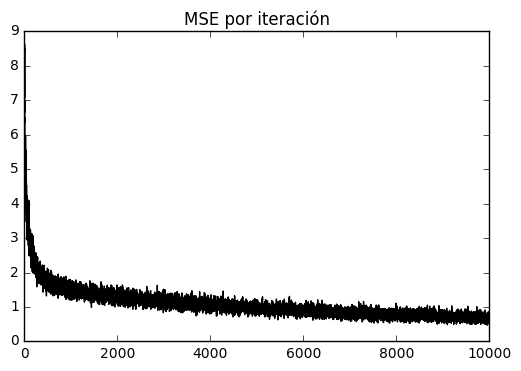

In [105]:
plt.plot(loss_vect, 'k-', label = "Función de pérdidas")
plt.title("MSE por iteración")
plt.show()

## Comprobando el modelo entrenado

In [106]:
test_board = [-1,0,0,1,-1,-1,0,0,1] 

print_board(test_board)

O| | 
_____
X|O|O
_____
 | |X


In [107]:
test_boards = [test_board]
feed_dict = {X:test_boards}
logits = session.run(model_output, feed_dict=feed_dict)
predictions = session.run(prediction, feed_dict=feed_dict)

In [131]:
print(logits.shape)
[logits]

(1, 9)


[array([[ 3.96149015,  4.12973833,  2.31308699,  6.18216133,  4.39329195,
          0.51937139,  7.38896036,  3.3936882 ,  4.18525839]], dtype=float32)]

In [130]:
np.argmax(logits,1) # es lo mismo que "predictions"

array([6])

In [109]:
print(predictions)

[6]


In [58]:
#devuelve 1 si alguien ganó
def check(board):
    wins = [[0,1,2], [3,4,5], [6,7,8], [0,3,6], [1,4,7], [2,5,8], [0,4,8], [2,4,6]] #lineas que se forman cuando ganas
    for i in range(len(wins)):
        if board[wins[i][0]]==board[wins[i][1]]==board[wins[i][2]]==1.0:
            return 1
        elif board[wins[i][0]]==board[wins[i][1]]==board[wins[i][2]]==-1.0:
            return 1
    return 0

In [62]:
game_tracker = [0,0,0,0,0,0,0,0,0]
win_logical = False
num_moves = 0
while not win_logical:
    player_idx = input('Introduce tu posición de juego (0-8): ')
    num_moves +=1
    game_tracker[int(player_idx)] = 1.0 #guarda posicion de usuario, 1-->usuario | -1 -->maquina
    
    [potential_moves] = session.run(model_output, feed_dict={X:[game_tracker]})
    allowed_moves = [ix for ix, x in enumerate(game_tracker) if x==0] #obtiene los lugares vacios
    '''model_move:
        si  el ix(index) esta en un espacio vacio agregalo, si el ix no esta en espacio vacio agrega -9999
        para que al final, de ese array tome el idx del valor maximo
    '''
    model_move = np.argmax([x if ix in allowed_moves else -9999 for ix, x in enumerate(potential_moves)])
    game_tracker[int(model_move)] = -1.0
    
    print("El modelo ha movido:")
    print_board(game_tracker)
    if check(game_tracker)==1 or num_moves>=5:
        print("Game Over")
        win_logical = True

Introduce tu posición de juego (0-8): 4
El modelo ha movido:
 | | 
_____
 |X| 
_____
 | |O
Introduce tu posición de juego (0-8): 0
El modelo ha movido:
X| | 
_____
 |X| 
_____
O| |O
Introduce tu posición de juego (0-8): 3
El modelo ha movido:
X| |O
_____
X|X| 
_____
O| |O
Introduce tu posición de juego (0-8): 1
El modelo ha movido:
X|X|O
_____
X|X| 
_____
O|O|O
Game Over
